<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Deep_Learning_%EB%93%9C%EB%A1%AD_%EC%95%84%EC%9B%83(Drop_out)_%EA%B8%B0%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

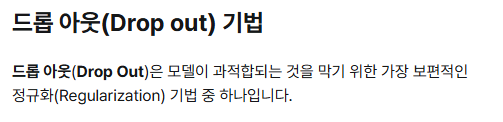

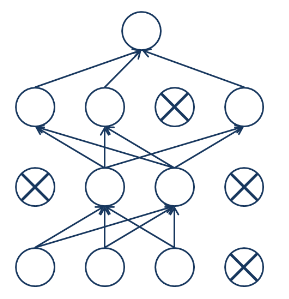

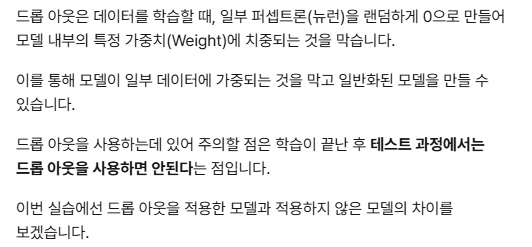

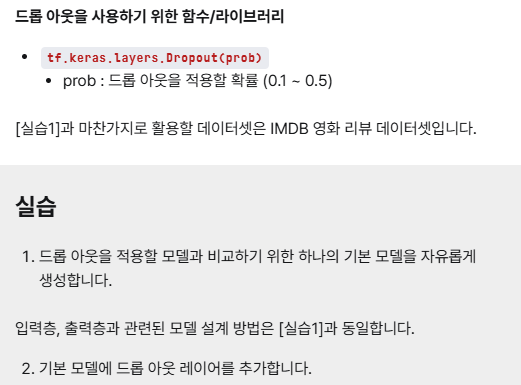

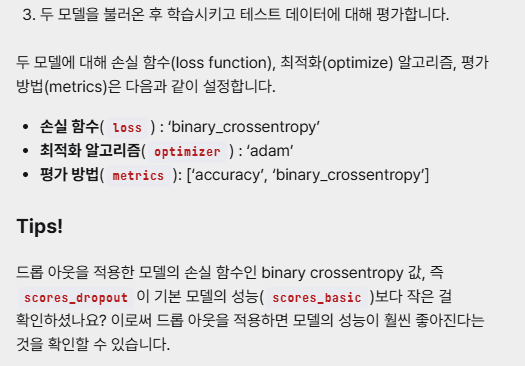

In [ ]:
import numpy as np
import tensorflow as tf
from visual import *

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# 데이터를 전처리하는 함수

def sequences_shaping(sequences, dimension):

    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0

    return results

'''
1. 드롭 아웃을 적용할 모델과 비교하기 위한
   하나의 기본 모델을 자유롭게 생성합니다.
'''

def Basic(word_num):

    basic_model = tf.keras.Sequential([tf.keras.layers.Dense(128, input_shape=(word_num, ), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

    return basic_model

'''
2. 기본 모델에 드롭 아웃 레이어를 추가합니다.
   일반적으로 마지막 히든층과 출력층 사이에 하나만 추가합니다.
   드롭 아웃 적용 확률은 자유롭게 설정하세요.
'''

def Dropout(word_num):

    dropout_model = tf.keras.Sequential([tf.keras.layers.Dense(128, input_shape=(word_num, ), activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')])

    return dropout_model

'''
3. 두 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. Basic, Dropout 함수를 이용해 두 모델을 불러옵니다.

   Step02. 두 모델의 손실 함수, 최적화 알고리즘,
           평가 방법을 설정합니다.

   Step03. 두 모델의 구조를 확인하는 코드를 작성합니다.

   Step04. 두 모델을 학습시킵니다.
           두 모델 모두 'epochs'는 20,
           'batch_size'는 500으로 설정합니다.
           검증용 데이터도 설정해주세요.

   Step05. 두 모델을 테스트하고
           binary crossentropy 점수를 출력합니다.
           둘 중 어느 모델의 성능이 더 좋은지 확인해보세요.
'''


def main():

    word_num = 100
    data_num = 25000

    # Keras에 내장되어 있는 imdb 데이터 세트를 불러오고 전처리합니다.

    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = word_num)

    train_data = sequences_shaping(train_data, dimension = word_num)
    test_data = sequences_shaping(test_data, dimension = word_num)

    basic_model = Basic(word_num)    # 기본 모델입니다.
    dropout_model = Dropout(word_num)  # 드롭 아웃을 적용할 모델입니다.

    basic_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_crossentropy'])
    dropout_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_crossentropy'])

    basic_model.summary()
    dropout_model.summary()

    basic_history = basic_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels), verbose=0)
    print('\n')
    dropout_history = dropout_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels), verbose=0)

    scores_basic = basic_model.evaluate(test_data, test_labels, verbose=0)
    scores_dropout = dropout_model.evaluate(test_data, test_labels, verbose=0)

    print('\nscores_basic: ', scores_basic[-1])
    print('scores_dropout: ', scores_dropout[-1])

    Visulaize([('Basic', basic_history),('Dropout', dropout_history)])

    return basic_history, dropout_history

if __name__ == "__main__":
    main()

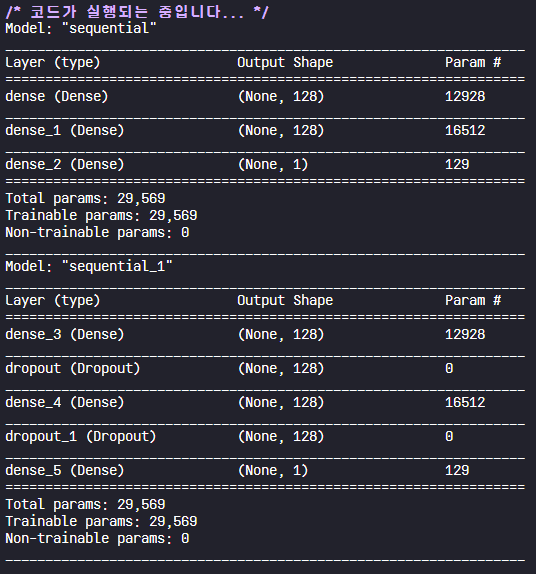

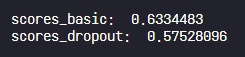

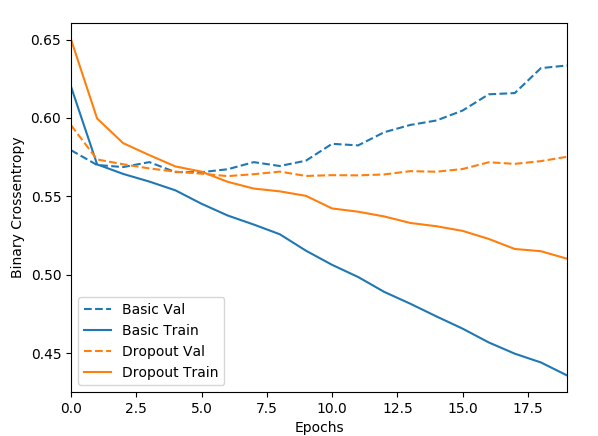

Dropout 썼을때 성능도 더 좋고, Overfitting 도 덜 발생한다.